In [2]:
import numpy as np
import pandas as pd
import scipy.stats as st

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

from xgboost import XGBRegressor


from sklearn.pipeline import make_pipeline, Pipeline

# Encoders
from sklearn.preprocessing import *


# Scalers
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler, Normalizer


In [3]:
df_emprestimo = pd.read_csv('C:\\Users\\diogo\\OneDrive\\Documentos\\Profissional\\ml_2\\aprovacao_credito_previsao\\credit_risk_dataset.csv')
df_emprestimo.head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3


In [4]:
# Rearranjando para colocar o target no local certo
df_emprestimo = df_emprestimo[['person_age', 'person_income', 'person_home_ownership', 'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt', 'loan_int_rate','loan_percent_income',
                                'cb_person_default_on_file', 'cb_person_cred_hist_length' ,'loan_status']]

# Renomeando as colunas para melhor entendimento do problema

df_emprestimo.columns = ['idade', 'renda', 'moradia', 'tempo_empregado', 'motivo_emp', 'risco_emp',
                          'valor_emp', 'taxa_juros', 'emp/renda', 'hist_inadimplencia', 'tempo_emp_hist', 'sts_emp']

In [5]:
# Começando as análises por colunas, iremos trabalhar olhando para o dataset no geral
df_emprestimo.isna().sum()

idade                    0
renda                    0
moradia                  0
tempo_empregado        895
motivo_emp               0
risco_emp                0
valor_emp                0
taxa_juros            3116
emp/renda                0
hist_inadimplencia       0
tempo_emp_hist           0
sts_emp                  0
dtype: int64

In [6]:
#percebemos que há uma necessidade de tratamento para as colunas de taxa de juros e de tempo empregado, esses valores serão tratados no futuro

In [7]:
# Realizando uma Análise Exploratória dos Dados
df_emprestimo.describe()

,idade,renda,tempo_empregado,valor_emp,taxa_juros,emp/renda,tempo_emp_hist,sts_emp
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.170203,5.804211,0.218164
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.106782,4.055001,0.413006
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.090000,3.000000,0.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.150000,4.000000,0.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.230000,8.000000,0.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [8]:
# Notamos que existem alguns dados que estão incorretos, como uma idade máxima de 144 anos e tempo empregado de 123 anos, iremos nos aprofundar nesses valores. 

(array([4.877e+03, 7.438e+03, 7.652e+03, 3.541e+03, 3.422e+03, 1.565e+03,
        1.646e+03, 6.750e+02, 7.000e+02, 3.050e+02, 2.960e+02, 1.240e+02,
        1.270e+02, 5.400e+01, 5.000e+01, 2.400e+01, 3.100e+01, 1.000e+01,
        1.900e+01, 5.000e+00, 7.000e+00, 3.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 3.000e+00]),
 array([ 20.  ,  22.48,  24.96,  27.44,  29.92,  32.4 ,  34.88,  37.36,
         39.84,  42.32,  44.8 ,  47.28,  49.76,  52.24,  54.72,  57.2 ,
         59.68,  62.16,  64.64,  67.12,  69.6 ,  72.08,  74.56,  77.04,
         79.52,  82.  ,  84.48,  86.96,  89.44,  91.92,  94.4 ,  96.88,
         99.36, 101.84, 104.32, 106.8 , 109.28, 111.76, 114.24, 116.72,
        119.2 , 

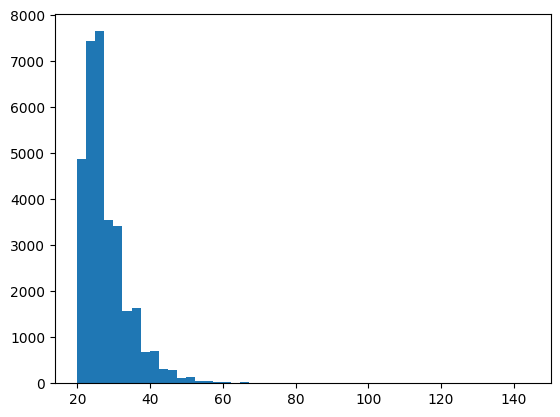

In [9]:
plt.hist(df_emprestimo.idade, bins = 50)

{'whiskers': [<matplotlib.lines.Line2D at 0x1f02eb557f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f02ebe51c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f02e6851c0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f02ebe5610>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f02ebe58e0>],
 'means': []}

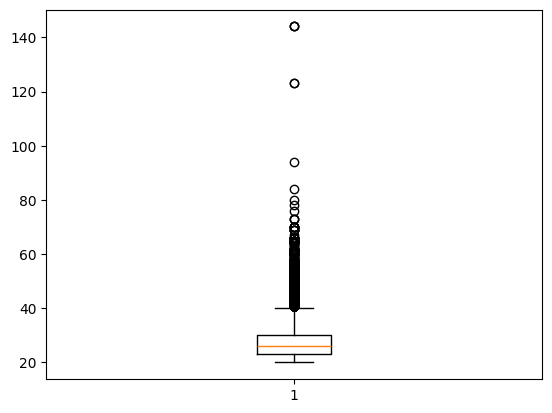

In [10]:
plt.boxplot(df_emprestimo.idade)

In [11]:
# Tratando os outliers
df_emprestimo[df_emprestimo['idade']>90]

,idade,renda,moradia,tempo_empregado,motivo_emp,risco_emp,valor_emp,taxa_juros,emp/renda,hist_inadimplencia,tempo_emp_hist,sts_emp
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0.02,N,3,0
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0.03,N,2,0
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0.25,N,3,0
747,123,78000,RENT,7.0,VENTURE,B,20000,NaN,0.26,N,4,0
32297,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.73,0.00,N,25,0
32416,94,24000,RENT,1.0,MEDICAL,C,6500,NaN,0.27,N,27,0


In [12]:
#como são poucos dados a saída para esses casos será excluí-los do dataset, temos dentre esses valores o valor da renda máxima também que foge muito da média e da banda de 75%
#Tambem podemos notar que a distribuição segue próxima do que se espera para uma distribuição de idade

df_emprestimo = df_emprestimo[df_emprestimo['idade']< 95]

In [13]:
df_emprestimo.describe()

,idade,renda,tempo_empregado,valor_emp,taxa_juros,emp/renda,tempo_emp_hist,sts_emp
count,32576.000000,3.257600e+04,31681.000000,32576.000000,29461.000000,32576.000000,32576.000000,32576.000000
mean,27.718044,6.588214e+04,4.789527,9589.117755,11.011547,0.170212,5.803966,0.218197
std,6.204990,5.253499e+04,4.142706,6321.886846,3.240623,0.106778,4.053791,0.413029
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.090000,3.000000,0.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.150000,4.000000,0.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.230000,8.000000,0.000000
max,94.000000,2.039784e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


(array([1.0985e+04, 1.5009e+04, 4.4950e+03, 1.2120e+03, 4.6700e+02,
        1.4400e+02, 9.2000e+01, 5.4000e+01, 2.4000e+01, 2.0000e+01,
        1.0000e+01, 6.0000e+00, 1.0000e+01, 6.0000e+00, 8.0000e+00,
        3.0000e+00, 1.0000e+00, 4.0000e+00, 4.0000e+00, 6.0000e+00,
        2.0000e+00, 1.0000e+00, 4.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([   4000.  ,   44715.68,   85431.36,  126147.04,  166862.72,
         207578.4 ,  248294.08,  289009.76,  329725.44,  370441.12,
         411156.8 ,  451872.48,  492588.16,  533303.84,  574019.52,
         614735.2 ,  655450.88,  696166.56,  736882.24,  777597.92,
         818313.6 ,  859029.28,  899744.96,  9

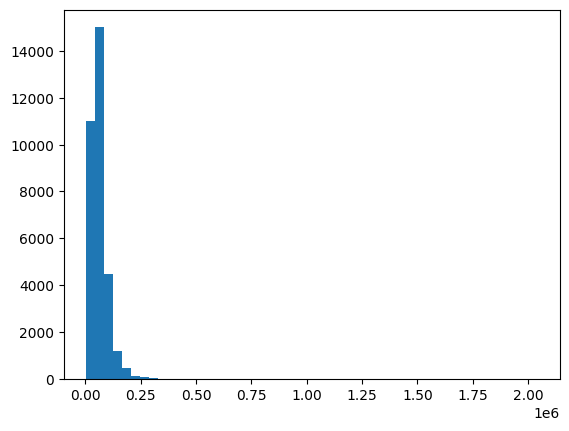

In [14]:
plt.hist(df_emprestimo['renda'], bins=50)

In [15]:
df_emprestimo[df_emprestimo['tempo_empregado'] >20]

,idade,renda,moradia,tempo_empregado,motivo_emp,risco_emp,valor_emp,taxa_juros,emp/renda,hist_inadimplencia,tempo_emp_hist,sts_emp
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,0.59,Y,3,1
210,21,192000,MORTGAGE,123.0,VENTURE,A,20000,6.54,0.10,N,4,0
29144,46,305000,MORTGAGE,22.0,VENTURE,E,20000,17.93,0.07,N,13,0
29195,38,192000,MORTGAGE,22.0,HOMEIMPROVEMENT,A,5600,7.90,0.03,N,14,0
29204,46,185000,MORTGAGE,22.0,VENTURE,B,20000,11.36,0.11,N,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32515,53,106000,MORTGAGE,38.0,PERSONAL,B,20000,9.88,0.19,N,23,0
32516,52,29000,OWN,23.0,PERSONAL,A,7000,7.49,0.24,N,20,0
32534,76,75000,RENT,23.0,MEDICAL,A,15000,8.94,0.20,N,25,0
32539,61,148000,MORTGAGE,30.0,DEBTCONSOLIDATION,B,24000,10.38,0.16,N,20,1


In [16]:
# Nota-se que as duas primeiras linhas estão com dados incosistentes, temos duas pessoas com mais tempo empregado do que tem de idade, iremos aprofundar para essa faixa

df_emprestimo[df_emprestimo['idade']<23].groupby('idade')['tempo_empregado'].value_counts()

idade  tempo_empregado
20     4.0                  10
       3.0                   3
       0.0                   1
       1.0                   1
21     5.0                 434
       2.0                 185
       0.0                 183
       3.0                 143
       1.0                  87
       4.0                  81
       6.0                  64
       123.0                 1
22     6.0                1084
       0.0                 473
       2.0                 441
       3.0                 415
       1.0                 356
       4.0                 317
       5.0                 272
       7.0                 160
       123.0                 1
Name: count, dtype: int64

In [17]:
# Apesar dos valores serem totalmente incosistentes,entende-se que por serem dados sintéticos para garantir a anonimatização do dataset
# não há a necessidade de tratamento. Apenas para os valores muito acima de 123 que serão trocados

st.mode(df_emprestimo['tempo_empregado'])

ModeResult(mode=0.0, count=4105)

In [43]:
# Também irá realizar o tratamento para os valores nulos que foram apresentados anteriormente
df_emprestimo['tempo_empregado']= df_emprestimo['tempo_empregado'].replace(123, 0)
df_emprestimo['tempo_empregado']= df_emprestimo['tempo_empregado'].fillna(0)

In [44]:
df_emprestimo.isna().sum()

idade                    0
renda                    0
moradia                  0
tempo_empregado          0
motivo_emp               0
risco_emp                0
valor_emp                0
taxa_juros            3115
emp/renda                0
hist_inadimplencia       0
tempo_emp_hist           0
sts_emp                  0
dtype: int64

In [19]:
# Checando os valores novos
df_emprestimo.describe()

,idade,renda,tempo_empregado,valor_emp,taxa_juros,emp/renda,tempo_emp_hist,sts_emp
count,32576.000000,3.257600e+04,31681.000000,32576.000000,29461.000000,32576.000000,32576.000000,32576.000000
mean,27.718044,6.588214e+04,4.781762,9589.117755,11.011547,0.170212,5.803966,0.218197
std,6.204990,5.253499e+04,4.035000,6321.886846,3.240623,0.106778,4.053791,0.413029
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.090000,3.000000,0.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.150000,4.000000,0.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.230000,8.000000,0.000000
max,94.000000,2.039784e+06,41.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [ ]:
df_emprestimo['moradia'].value_counts()

moradia
RENT        16443
MORTGAGE    13442
OWN          2584
OTHER         107
Name: count, dtype: int64

In [ ]:
#Trocando os valores para portugues para facilitar a visualização

df_emprestimo['moradia'] = df_emprestimo['moradia'].replace('RENT', 'aluguel')
df_emprestimo['moradia'] = df_emprestimo['moradia'].replace('MORTGAGE', 'financiamento')
df_emprestimo['moradia'] = df_emprestimo['moradia'].replace('OWN', 'propria')
df_emprestimo['moradia'] = df_emprestimo['moradia'].replace('OTHER', 'outro')

In [40]:
df_emprestimo.groupby('sts_emp')['moradia'].value_counts(normalize=True).unstack()

moradia,aluguel,financiamento,outro,propria
sts_emp,,,,
0,0.441770,0.461442,0.002906,0.093883
1,0.730445,0.237760,0.004643,0.027153


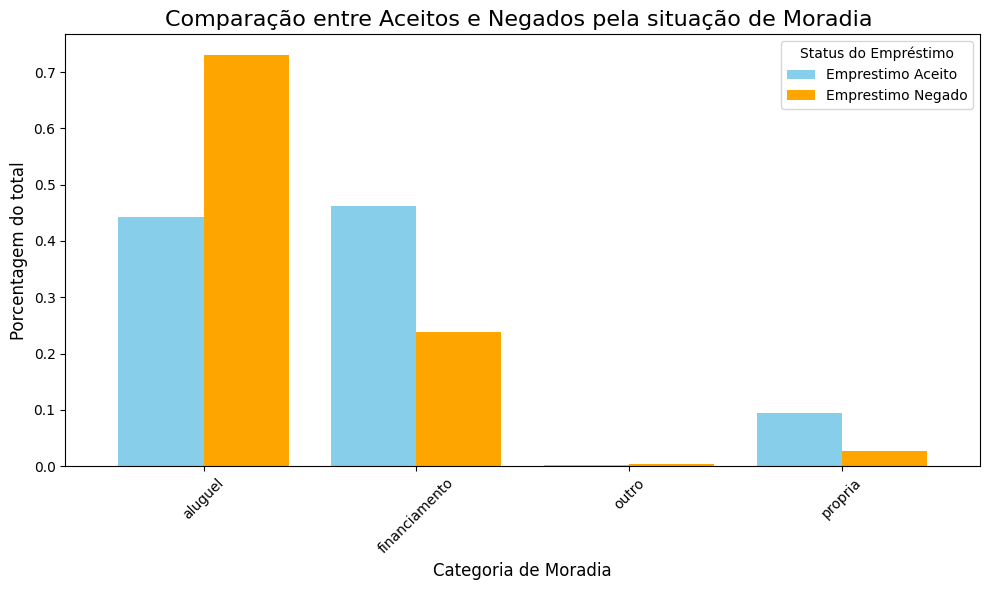

In [41]:
df = df_emprestimo.groupby('sts_emp')['moradia'].value_counts(normalize=True).unstack()

# Configurando o gráfico
ax = df.T.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'orange'], width=0.8)

# Personalizando o gráfico
ax.set_title("Comparação entre Aceitos e Negados pela situação de Moradia ", fontsize=16)
ax.set_xlabel("Categoria de Moradia", fontsize=12)
ax.set_ylabel("Porcentagem do total", fontsize=12)
ax.legend(["Emprestimo Aceito", "Emprestimo Negado"], title="Status do Empréstimo")
plt.xticks(rotation=45)

# Exibir o gráfico
plt.tight_layout()
plt.show()

In [45]:
# Podemos notar que essa é uma Feature importante para determinar se o empréstimo será aceito ou não
# Faremos a substituição para o motivo também e iremos analisar
df_emprestimo['motivo_emp'].value_counts()


motivo_emp
EDUCATION            6451
MEDICAL              6071
VENTURE              5717
PERSONAL             5520
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: count, dtype: int64

In [48]:
df_emprestimo['motivo_emp'] = df_emprestimo['motivo_emp'].replace('EDUCATION', 'educacao')
df_emprestimo['motivo_emp'] = df_emprestimo['motivo_emp'].replace('MEDICAL', 'saude')
df_emprestimo['motivo_emp'] = df_emprestimo['motivo_emp'].replace('VENTURE', 'investimento')
df_emprestimo['motivo_emp'] = df_emprestimo['motivo_emp'].replace('PERSONAL', 'pessoal')
df_emprestimo['motivo_emp'] = df_emprestimo['motivo_emp'].replace('DEBTCONSOLIDATION', 'consolidacao_dividas')
df_emprestimo['motivo_emp'] = df_emprestimo['motivo_emp'].replace('HOMEIMPROVEMENT', 'reforma')


In [49]:
df_emprestimo.groupby('sts_emp')['motivo_emp'].value_counts(normalize=True).unstack()

motivo_emp,consolidacao_dividas,educacao,investimento,pessoal,reforma,saude
sts_emp,,,,,,
0,0.146144,0.209675,0.191220,0.173630,0.104602,0.174729
1,0.209623,0.156303,0.119162,0.154474,0.132386,0.228053


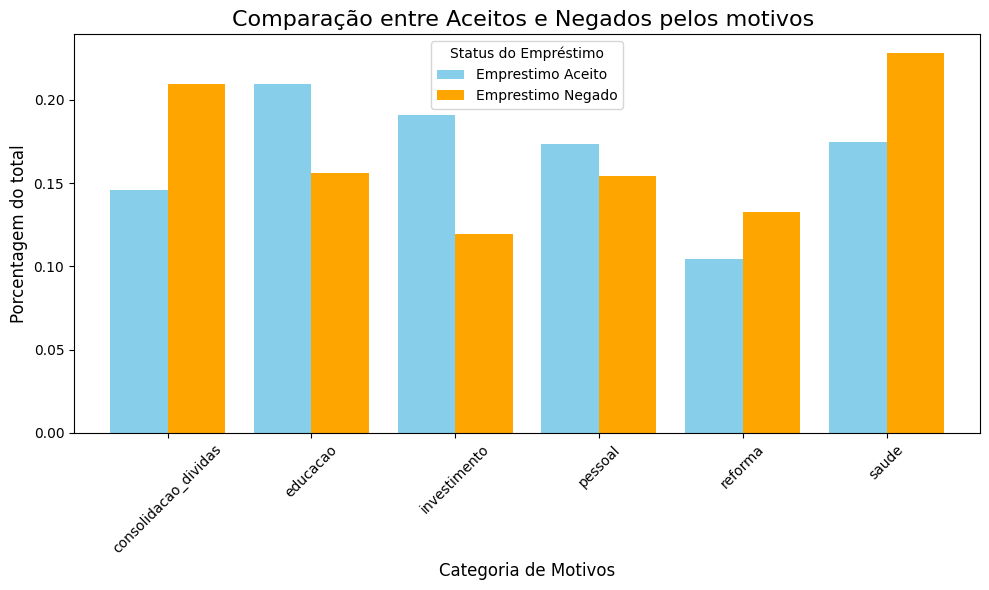

In [51]:
df2 = df_emprestimo.groupby('sts_emp')['motivo_emp'].value_counts(normalize=True).unstack()

# Configurando o gráfico
ax = df2.T.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'orange'], width=0.8)

# Personalizando o gráfico
ax.set_title("Comparação entre Aceitos e Negados pelos motivos ", fontsize=16)
ax.set_xlabel("Categoria de Motivos", fontsize=12)
ax.set_ylabel("Porcentagem do total", fontsize=12)
ax.legend(["Emprestimo Aceito", "Emprestimo Negado"], title="Status do Empréstimo")
plt.xticks(rotation=45)

# Exibir o gráfico
plt.tight_layout()
plt.show()

(array([5.940e+02, 1.213e+03, 2.770e+02, 8.430e+02, 1.172e+03, 1.917e+03,
        1.754e+03, 2.120e+02, 6.690e+02, 8.380e+02, 3.530e+02, 5.520e+02,
        1.308e+03, 1.016e+03, 1.296e+03, 1.182e+03, 8.190e+02, 1.290e+03,
        1.258e+03, 9.690e+02, 1.135e+03, 1.161e+03, 1.055e+03, 7.120e+02,
        9.940e+02, 6.900e+02, 7.430e+02, 7.250e+02, 5.110e+02, 5.260e+02,
        3.940e+02, 3.040e+02, 1.880e+02, 1.770e+02, 1.150e+02, 9.100e+01,
        1.120e+02, 7.900e+01, 7.100e+01, 3.800e+01, 3.400e+01, 2.700e+01,
        9.000e+00, 1.300e+01, 1.300e+01, 6.000e+00, 4.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00]),
 array([ 5.42 ,  5.776,  6.132,  6.488,  6.844,  7.2  ,  7.556,  7.912,
         8.268,  8.624,  8.98 ,  9.336,  9.692, 10.048, 10.404, 10.76 ,
        11.116, 11.472, 11.828, 12.184, 12.54 , 12.896, 13.252, 13.608,
        13.964, 14.32 , 14.676, 15.032, 15.388, 15.744, 16.1  , 16.456,
        16.812, 17.168, 17.524, 17.88 , 18.236, 18.592, 18.948, 19.304,
        19.66 , 

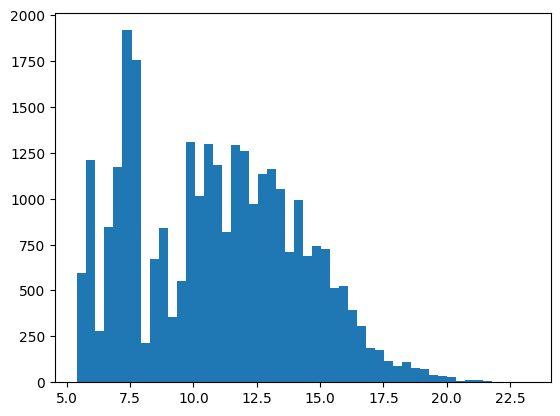

In [52]:
plt.hist(df_emprestimo['taxa_juros'], bins=50)